In [1]:
from FundSelection import FundSelection
from Portfolio import Portfolio

PORTFOLIO_YEARS = 6
N_PORTFOLIOS = 1000000
RISK_FREE_RATE = 0.0375 

abridged_fund_selection = [
    FundSelection('JupiterMerian Glb Eq AbsRt I £ H Acc'),
    FundSelection('Prem Miton Tellworth UK Sel Fd - Cl AAcc'),
    FundSelection('JPM Europe Equity Absolute Alpha C (perf) (dist) - GBP (hedged)'),
    FundSelection('Man High Yield Opports Profl Acc C'), 
]

# Only data from 2022, so proxy earlier years with the best Sharpe ratio weghtings from the other funds
man_dynamic_income = FundSelection('Man Dynamic Income I H GBP Cap', proxy_funds=abridged_fund_selection)

full_fund_selection = abridged_fund_selection + [
    man_dynamic_income
]

benchmark = [
    FundSelection('Ranmore Global Equity Investor GBP', 0.25),
    FundSelection('L&G Global 100 Index I Acc', 0.13, proxy_funds=[FundSelection('Fidelity Global Technology W-Acc-GBP', 1.0)]),
    FundSelection('MFS Meridian Contrarian Value W1 GBP', 0.06),
    FundSelection('FAST - Global Fund Y-PF-ACC-GBP', 0.06),
    FundSelection('YFS Argonaut Absolute Return I GBP Acc', 0.10),
    FundSelection('BH Macro GBP Ord', 0.10),
    FundSelection('WisdomTree Physical Gold GBP Daily Hdgd', 0.10),
    FundSelection('Winton Trend UCITS I GBP Acc', 0.05),
    FundSelection('iShares Blmbrg Enh Roll Yld Cmd Swap ETF GBP',0.05),
    FundSelection('JupiterMerian Glb Eq AbsRt I £ H Acc', 0.05),
    FundSelection('Prem Miton Tellworth UK Sel Fd - Cl AAcc', 0.05)
]

# Abridged Portfolio excludes Man Dynamic - calculate max Sharpe Ratio and associated weights to backfill proxy fund weights in full portfolio
abridged_portfolio = Portfolio(abridged_fund_selection, benchmark, PORTFOLIO_YEARS)
abridged_portfolio.optimize_weights(N_PORTFOLIOS, RISK_FREE_RATE)

# Full Portfolio - 1st 3 years of Man Dynamic Income fund backfilled with the proxy fund weights from the abridged portfolio
full_portfolio = Portfolio(full_fund_selection, benchmark, PORTFOLIO_YEARS)
full_max_sharpe_portf = full_portfolio.optimize_weights(N_PORTFOLIOS, RISK_FREE_RATE)

C:\Users\Pandelus\AppData\Roaming\Python\Python313\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


C:\Users\Pandelus\AppData\Roaming\Python\Python313\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.066%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
c:\Users\Pandelus\source\repos\Portfolio\Jupyter\Portfolio.py:493: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\Users\Pandelus\source\repos\Portfolio\Jupyter\Portfolio.py:325: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=max_sharpe_portf['AverageReturns'][asset_index],
C:\Users\Pandelus\AppData\Roaming\Python\Python313\site-packa

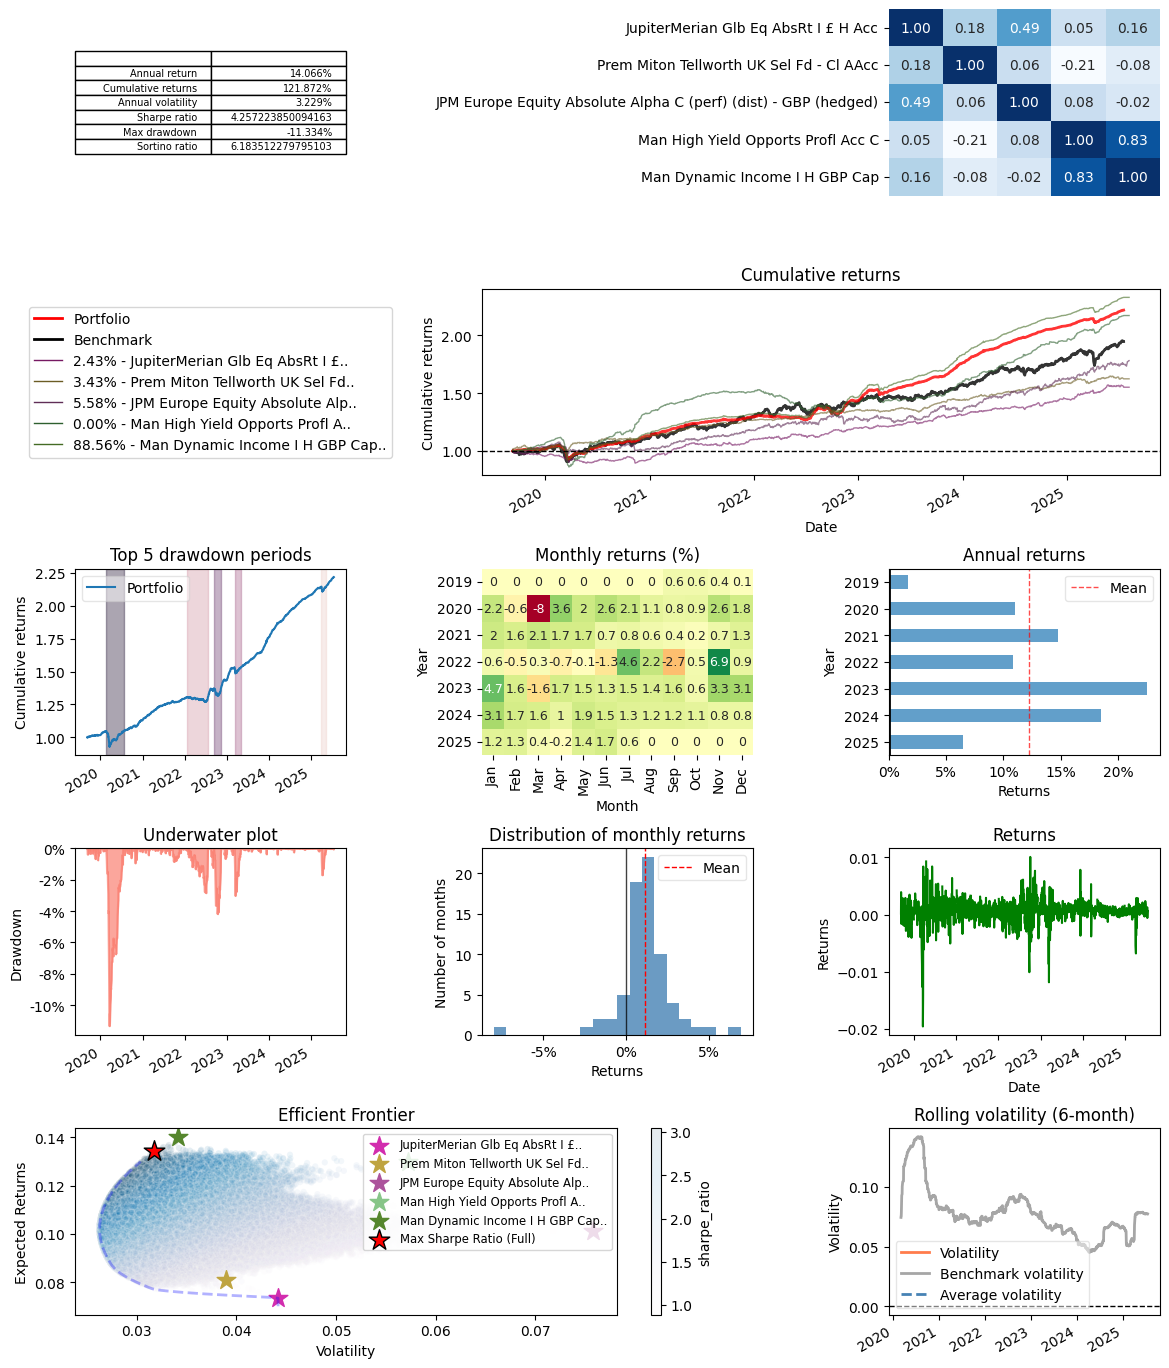

In [2]:
full_portfolio.plot_returns_tear_sheet(full_max_sharpe_portf)